In [27]:
using Images
using TestImages
using FileIO
using Colors
using ImageFeatures
using Formatting
using Plots
using DSP

In [28]:
function hough(img)
  rows, cols = size(img)
  D = round(Int32, sqrt(rows ^ 2 + cols ^ 2))
  rhos = -D:1:D
  thetas = deg2rad.(-90:1:90)

  A = zeros(Int32, length(rhos), length(thetas))
  sins, coss = sin.(thetas), cos.(thetas)
  
  for idx in CartesianIndices(img)
    if img[idx] == 0
      # 0 or false
      continue
    end

    y, x = Tuple(idx)
    for thetaIdx in 1:length(thetas)
      rho = x * coss[thetaIdx] + y * sins[thetaIdx]
      rho = round(Int32, rho)
      A[rho + D, thetaIdx] += 1
    end
  end
  
  rowsA, colsA = size(A)
  for idx in CartesianIndices(A)
    y, x = Tuple(idx)
    if x == 1 || y == 1 || x == colsA || y == rowsA
      continue
    end
    C = A[idx]
    C1 = (C < A[y - 1, x - 1]) || (C < A[y - 1, x])
    C2 = (C < A[y - 1, x + 1]) || (C < A[y, x + 1])
    C3 = (C < A[y + 1, x + 1]) || (C < A[y + 1, x])
    C4 = (C < A[y + 1, x - 1]) || (C < A[y, x - 1])
    if C1 || C2 || C3 || C4
      A[idx] = 0
    end
  end

  A, rhos, thetas
end


hough (generic function with 1 method)

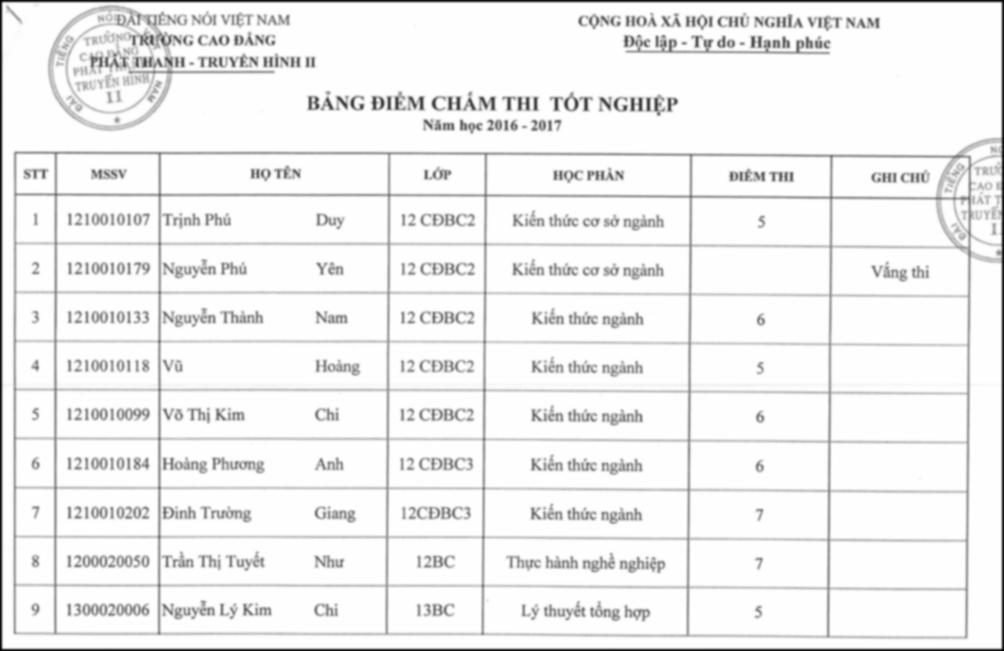

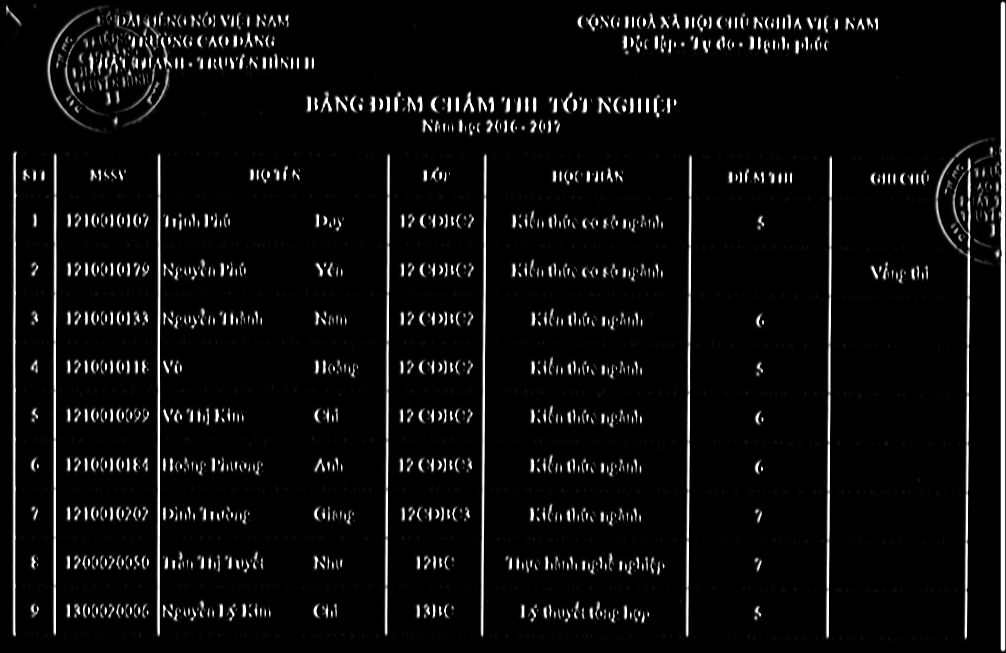

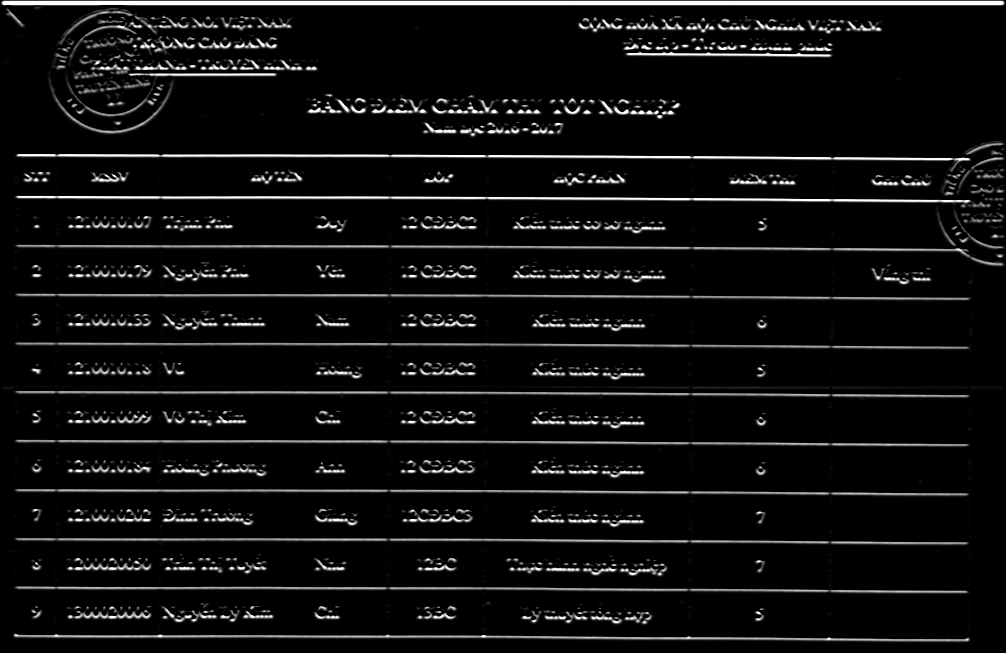

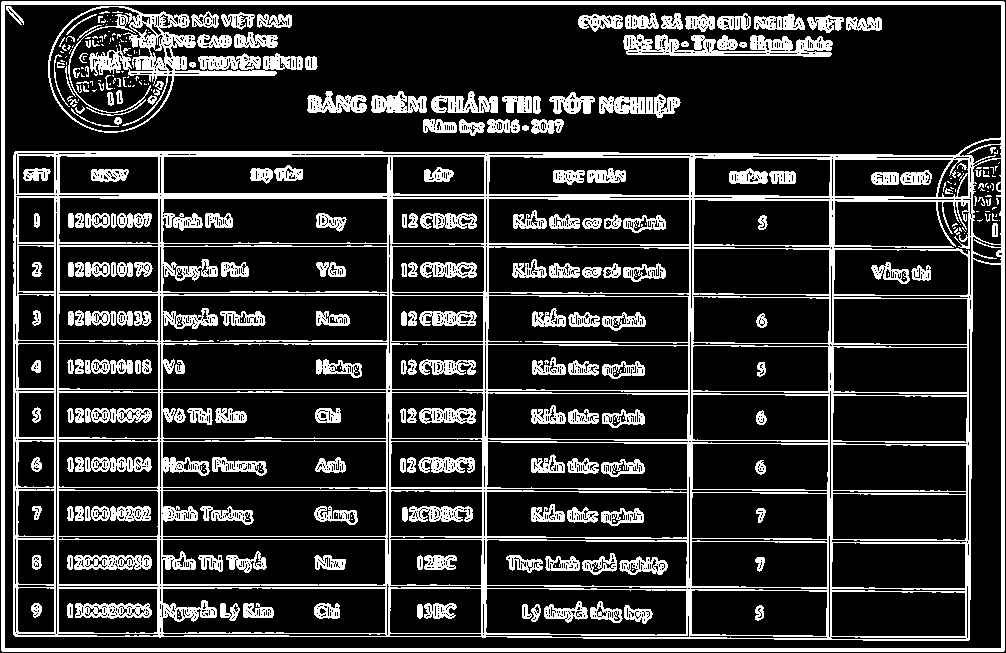

In [29]:
gaussian_kernel = [
  1 4 6 4 1
  4 16 24 16 4
  6 24 36 24 6
  4 16 24 16 4
  1 4 6 4 1
] ./ 256

sobel_x_kernel = [
  -1 0 1
  -2 0 2
  -1 0 1
]
sobel_y_kernel = rotl90(sobel_x_kernel)

img = load("../images/bangdiem.png")
img_gray = Float64.(Gray.(img))
sobel_x_kernel = Float64.(sobel_x_kernel)
sobel_y_kernel = Float64.(sobel_y_kernel)

img_blur = conv2(img_gray, gaussian_kernel)
img_edge_x = conv2(img_blur, sobel_x_kernel)
img_edge_y = conv2(img_blur, sobel_y_kernel)

img_edge = round.(Int32, sqrt.((img_edge_x .^ 2) .+ (img_edge_y .^ 2)))
img_edge[img_edge .> 0] .= 1
img_bool = zeros(Bool, size(img_edge))
img_bool[img_edge .> 0] .= true

display(Gray.(img_blur))
display(Gray.(img_edge_x))
display(Gray.(img_edge_y))
display(Gray.(img_edge))
# display(img_bool)

In [30]:
# using LinearAlgebra
# sample = zeros(Int32, 50,50)
# sample[10:39, 10:39] = I(30)
# sample = zeros(Int32, 30, 30)
# sample[25,5] = 1
# sample[10,20] = 1
# acc, r, t = hough(sample)
# img = Gray.(sample)

acc, rhos, thetas = hough(img_edge)

for i in 1:50
  r_idx, t_idx = Tuple(argmax(acc))
  acc[r_idx, t_idx] = 0
  display((rhos[r_idx], rad2deg(thetas[t_idx])))
end

(-652, -90.0)

(-651, -90.0)

(-650, -90.0)

(-6, -90.0)

(-5, -90.0)

(-4, -90.0)

(2, 90.0)

(3, 90.0)

(4, 90.0)

(648, 90.0)

(649, 90.0)

(650, 90.0)

(-653, -90.0)

(-3, -90.0)

(1, 90.0)

(651, 90.0)

(-157, -90.0)

(155, 90.0)

(-158, -90.0)

(156, 90.0)

(-199, -90.0)

(197, 90.0)

(-200, -90.0)

(198, 90.0)

(-198, -90.0)

(196, 90.0)

(-638, -90.0)

(636, 90.0)

(-297, -90.0)

(295, 90.0)

(-394, -90.0)

(392, 90.0)

(-443, -90.0)

(441, 90.0)

(-541, -90.0)

(539, 90.0)

(-248, -90.0)

(246, 90.0)

(-492, -90.0)

(490, 90.0)

(-590, -90.0)

(588, 90.0)

(-589, -90.0)

(587, 90.0)

(-155, -90.0)

(153, 90.0)

(-197, -90.0)

(195, 90.0)

(2, 0.0)

(3, 0.0)

In [31]:
lines = hough_transform_standard(img_bool)

39-element Array{Tuple{Float64,Float64},1}:
 (3.0, 1.5707963267948966)  
 (649.0, 1.5707963267948966)
 (155.0, 1.5756147204353717)
 (152.0, 1.5756147204353717)
 (197.0, 1.5756147204353717)
 (194.0, 1.5756147204353717)
 (193.0, 1.5804331140758467)
 (156.0, 1.5707963267948966)
 (198.0, 1.5707963267948966)
 (1.0, 1.5756147204353717)  
 (6.0, 1.5659779331544215)  
 (648.0, 1.5756147204353717)
 (653.0, 1.5659779331544215)
 ⋮                          
 (245.0, 1.5756147204353717)
 (491.0, 1.5707963267948966)
 (635.0, 1.5756147204353717)
 (589.0, 1.5707963267948966)
 (633.0, 1.5756147204353717)
 (242.0, 1.5756147204353717)
 (200.0, 1.5659779331544215)
 (632.0, 1.5804331140758467)
 (440.0, 1.5756147204353717)
 (158.0, 1.5659779331544215)
 (391.0, 1.5756147204353717)
 (536.0, 1.5756147204353717)

In [36]:
rows, cols = size(img)
plt = plot(img)
for i in 1:50
  r_idx, t_idx = Tuple(argmax(acc))
  acc[r_idx, t_idx] = 0
  
  rho, theta = rhos[r_idx], thetas[t_idx]
  x = 1:cols
  y = (rho .- x .* cos(theta)) ./ sin(theta)
  # display((rhos[r_idx], rad2deg(thetas[t_idx])))
  # display((x, y))
  push!(plt, x, y)
end